<a href="https://colab.research.google.com/github/plaban1981/Hugging_Face_transformers_topics/blob/main/Introducing_Whisper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Whisper is an automatic speech recognition (ASR) system trained on 680,000 hours of multilingual and multitask supervised data collected from the web. 
* We show that the use of such a large and diverse dataset leads to improved robustness to accents, background noise and technical language. 
* Moreover, it enables transcription in multiple languages, as well as translation from those languages into English.

In [1]:
!pip install git+https://github.com/openai/whisper.git 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-96kq4vds
  Running command git clone -q https://github.com/openai/whisper.git /tmp/pip-req-build-96kq4vds
     |████████████████████████████████| 4.9 MB 2.1 MB/s 
     |████████████████████████████████| 120 kB 68.5 MB/s 
     |████████████████████████████████| 6.6 MB 50.2 MB/s 
  Created wheel for whisper: filename=whisper-1.0-py3-none-any.whl size=1174990 sha256=f8b6cc3adc7dd04d7c2691ed189d78a60f5458c9bf38fe28a9e7472bc6b4738e
  Stored in directory: /tmp/pip-ephem-wheel-cache-ryjo0lma/wheels/16/15/89/1c7bb31bd0006793a95549d04785121a8a36daad9158e1e43a
Successfully built whisper


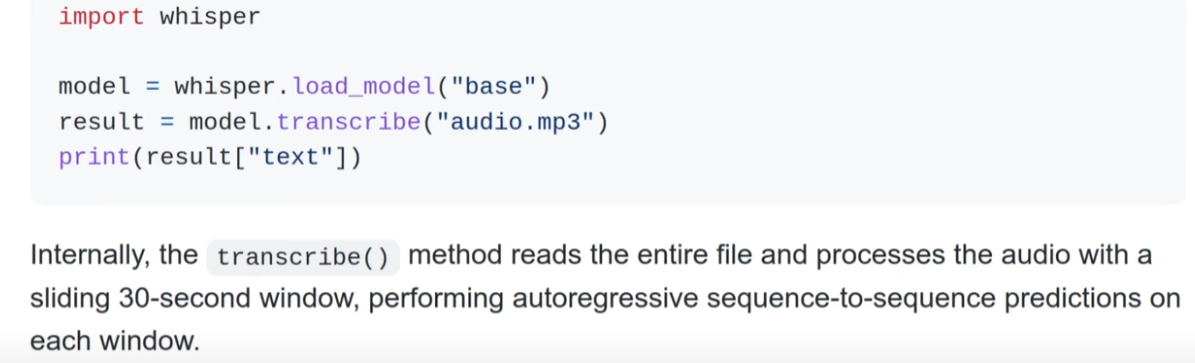

In [13]:
import whisper
model = whisper.load_model("base")

## Load Audio

In [33]:
#load audio and pad/trim it to fit 30 seconds
audio = whisper.load_audio("/content/testing2.wav")
audio = whisper.pad_or_trim(audio)

## Make log-Mel spectogram and move the model to the same device

In [34]:
model.device

device(type='cpu')

In [35]:
mel = whisper.log_mel_spectrogram(audio).to(model.device)

## Detect the spoken language

In [7]:
languages = {"af_za": "Afrikaans", "am_et": "Amharic", "ar_eg": "Arabic", "as_in": "Assamese", "az_az": "Azerbaijani", "be_by": "Belarusian", "bg_bg": "Bulgarian", "bn_in": "Bengali", "bs_ba": "Bosnian", "ca_es": "Catalan", "cmn_hans_cn": "Chinese", "cs_cz": "Czech", "cy_gb": "Welsh", "da_dk": "Danish", "de_de": "German", "el_gr": "Greek", "en_us": "English", "es_419": "Spanish", "et_ee": "Estonian", "fa_ir": "Persian", "fi_fi": "Finnish", "fil_ph": "Tagalog", "fr_fr": "French", "gl_es": "Galician", "gu_in": "Gujarati", "ha_ng": "Hausa", "he_il": "Hebrew", "hi_in": "Hindi", "hr_hr": "Croatian", "hu_hu": "Hungarian", "hy_am": "Armenian", "id_id": "Indonesian", "is_is": "Icelandic", "it_it": "Italian", "ja_jp": "Japanese", "jv_id": "Javanese", "ka_ge": "Georgian", "kk_kz": "Kazakh", "km_kh": "Khmer", "kn_in": "Kannada", "ko_kr": "Korean", "lb_lu": "Luxembourgish", "ln_cd": "Lingala", "lo_la": "Lao", "lt_lt": "Lithuanian", "lv_lv": "Latvian", "mi_nz": "Maori", "mk_mk": "Macedonian", "ml_in": "Malayalam", "mn_mn": "Mongolian", "mr_in": "Marathi", "ms_my": "Malay", "mt_mt": "Maltese", "my_mm": "Myanmar", "nb_no": "Norwegian", "ne_np": "Nepali", "nl_nl": "Dutch", "oc_fr": "Occitan", "pa_in": "Punjabi", "pl_pl": "Polish", "ps_af": "Pashto", "pt_br": "Portuguese", "ro_ro": "Romanian", "ru_ru": "Russian", "sd_in": "Sindhi", "sk_sk": "Slovak", "sl_si": "Slovenian", "sn_zw": "Shona", "so_so": "Somali", "sr_rs": "Serbian", "sv_se": "Swedish", "sw_ke": "Swahili", "ta_in": "Tamil", "te_in": "Telugu", "tg_tj": "Tajik", "th_th": "Thai", "tr_tr": "Turkish", "uk_ua": "Ukrainian", "ur_pk": "Urdu", "uz_uz": "Uzbek", "vi_vn": "Vietnamese", "yo_ng": "Yoruba"}
print(len(languages))

82


In [36]:
_,probs = model.detect_language(mel)
print(f"Detected Language : {max(probs,key=probs.get)}")

Detected Language : en


## Decode audio

* RuntimeError: "slow_conv2d_cpu" not implemented for 'Half' --> to avoid this set fp16=False in Decoding options

In [37]:
options = whisper.DecodingOptions(fp16=False)
result = whisper.decode(model,mel,options)

In [38]:
print(result.text)

Hi, I have been trying openly I whisper which is a phenomenal development for converting speech to text. As a part of this, I will be testing with this all you find by saving.wab for live.


##option 2

In [40]:
result = model.transcribe("/content/testing2.wav",fp16=False)

## Print the recognized text

In [20]:
print(type(result))

<class 'dict'>


In [41]:
result['text']

' Hi, I have been trying openly I whisper which is a phenomenal development for converting speech to text. As a part of this I will be testing with this audio file by saving it in.WAB for.WAB for'

## Comparing Whisper with Speech recognition Library

In [28]:
!pip install SpeechRecognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 105 kB/s 


In [42]:
import speech_recognition as sr
r = sr.Recognizer()
with sr.AudioFile("/content/testing2.wav") as source:
  audio_text = r.listen(source)
r.recognize_google(audio_text,show_all=False)

'I have been trying open today which is a phenomenal definition for converting speech to text'

* openAI Whisper translates audio to text with more accuracy compared to speech_recognition package

## Python Code for Speech-to-Text in three lines

In [44]:
import whisper
model = whisper.load_model('medium')
model.transcribe("testing.mp3",fp16=False)['text']

' I am composing soundscapes tracks all in audacity and works really well although I have to be very carefully with the applied effects but now with this non-destructive effects update I might not need any other software. Thank you audacity team. I am composing soundscapes tracks all in audacity and works really well although I have to be very careful with the applied effects update. Thank you audacity team.'